
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
#df.columns

In [ ]:
# Consideramos solo estas dos columnas como relevantes para este problema
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

In [ ]:
#df.tools_programming_languages.unique()

# Resolución del ejercicio 1:

Responder a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

Realizamos los siguientes pasos para responder esta pregunta:

Primero, eliminaremos del dataset filas que contengan valores no deseados de la columna sueldo (salary_monthly_NETO). Aquí usaremos dos criterios. El primero es considerar como outliers aquellos valores de sueldo que sean mayores al valor maxq, donde maxq = Q3+1.5*IQR. El segundo criterio es quedarnos con la subpoblación de sueldos que sean mayores a $25000, por considerar esta subpoblación más realista.

Segundo, seleccionaremos una subpoblación de lenguajes de programación, utilizando como criterio los lenguajes que cuenten con más de 1000 usuari@s en la presente encuesta.

Tercero, a cada lenguaje de programación elegido le calcularemos su distribución de sueldos y su mediana y XXXXXXXXX. Con estas metricas y graficas construiremos la conclusión de lo analizado.


# 1°) Eliminación de valores extremos de salary_monthly_NETO y construcción de subpoblación de la misma.

Utilizando el criterio de considerar outliers aquellos datos mayores a maxq = Q3+1.5*IQR, eliminaremos filas de la columna 'salary_monthly_NETO'.

Además, tomaremos para nuestro futuro análisis la subpoblacion de sueldos mayores a $25000, por considerarla más acorde a la pregunta que buscamos responder.

In [ ]:
salary_col='salary_monthly_NETO'

In [ ]:
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
#Calculamos maxq, que luego lo usaremos para definir outliers
q3 = df['salary_monthly_NETO'].quantile(75/100) #(97 / 100) #q3=106000.00
q1 = df['salary_monthly_NETO'].quantile(25/100) #(97 / 100) #q1=51480.00
iqr = q3 - q1
maxq= q3+1.5*iqr
print(maxq)
#otro criterio
q95 = df['salary_monthly_NETO'].quantile(95 / 100)
print(q95)

187780.0
210000.0


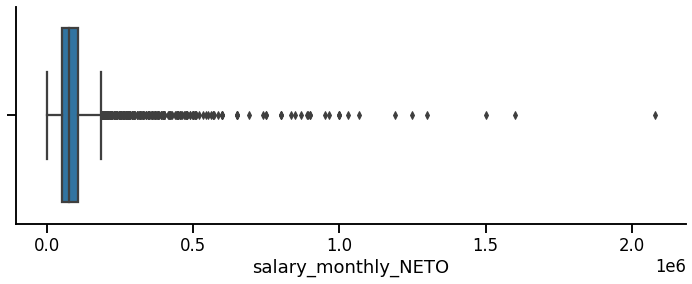

In [ ]:
#visualizamos maxq y los puntos a tirar:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[salary_col])
seaborn.despine()

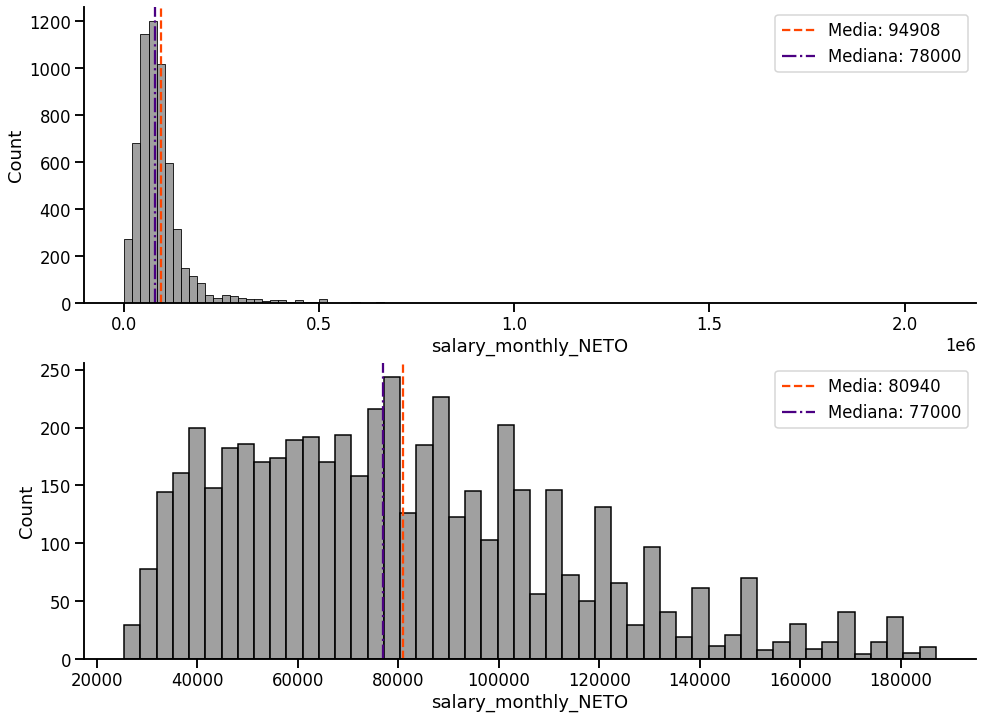

In [ ]:
# construccion del dataset filtrado por salario: filtered_df
# y lo comparamos con el original
fig, axes = plt.subplots(nrows=2, figsize=(16, 12))
#seaborn.histplot(df[salary_col], bins=np.logspace(3,7,40), ax=axes[0], color='gray')
seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media: '+str('{:5.0f}'.format(df[salary_col].mean())))
#axes[0].set_xscale("log")
#axes[0].set_yscale("log")
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana: '+str('{:5.0f}'.format(df[salary_col].median())))

limite_inferior=25000
filtered_df = df[(limite_inferior< df[salary_col]) & (df[salary_col] < maxq)]
seaborn.histplot(filtered_df[salary_col], bins=50, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media: '+str('{:5.0f}'.format(filtered_df[salary_col].mean())))
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana: '+str('{:5.0f}'.format(filtered_df[salary_col].median())))

axes[0].legend()
axes[1].legend()
seaborn.despine()

In [ ]:
#Comparamos las metricas del dataset original,
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
#con las del nuevo dataset:
filtered_df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count      5150.00
mean      80940.05
std       33792.81
min       25400.00
25%       54000.00
50%       77000.00
75%      100000.00
max      187000.00
Name: salary_monthly_NETO, dtype: object

Observamos que en total tiramos 5883 - 5150 = 733 filas, lo que corresponde a un 12% del total. Si bien este no es un porcentaje para nada despreciable, consideramos más adecuado quedarnos con esta subpoblación para hacer el análisis, aunque este análisis sea justamente condicional a una subpoblación.

Observamos también que la mediana se modificó apenas en un 1%, mientras que la media en un 14%. La diferencia entre media y mediana se redujo notablemente, (lo que significa que .... ???)

La distancia entre media y mediana tambien se redujo, lo que significa que tenemos mayor densidad en la muestra ???

In [ ]:
filtered_df[salary_col][:3]

0     43000.0
1     63000.0
2    127000.0
Name: salary_monthly_NETO, dtype: float64

# 2°) Seleccionamos los lenguajes de programacion más usados por les encuestades.

Para ello haremos un conteo de frecuencias de los lenguajes de programación, y utilizaremos como criterio quedarnos con aquellos lenguajes con más de 1000 usuaries.




La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.

In [ ]:
filtered_df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
#(ACA me tira un warning o algo, no entiendo por que. lo unico que hice fue
#reemplazar filtered_df donde decia df. ELENA)

# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
filtered_df.loc[:, 'cured_programming_languages'] = filtered_df\
    .tools_programming_languages.apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = filtered_df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(filtered_df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:12]

,language,frequency
0,javascript,2068
1,sql,1851
2,html,1553
3,java,1240
4,python,1218
5,css,1040
6,bash/shell,855
7,php,740
8,.net,703
9,typescript,632


### Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filtramos los lenguajes con menos de 1000 usuaries:
interesting_languages = ["javascript","html","sql","python", "java", "css"] 
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


In [ ]:
#df_lang[df_lang.programming_language.isin(["python"])].describe()

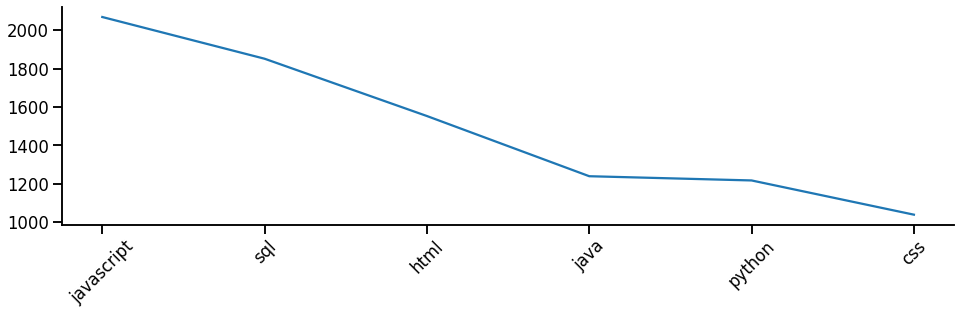

In [ ]:
count_by_progr_lang = filtered_df_lang.programming_language.value_counts()
fig = plt.figure(figsize=(16, 4))
seaborn.lineplot(x=count_by_progr_lang.index, y=count_by_progr_lang.values)
plt.xticks(rotation=45)
seaborn.despine()

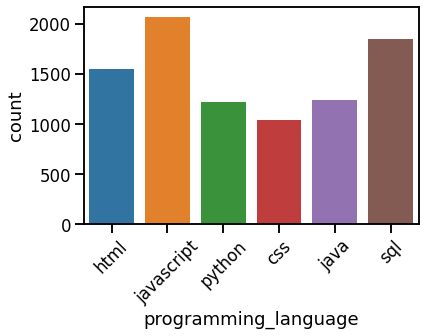

In [ ]:
seaborn.countplot(data=filtered_df_lang, x='programming_language') 
plt.xticks(rotation=45);

In [ ]:

#medianas:
pd=filtered_df_lang.groupby('programming_language').median().salary_monthly_NETO
pd.sort_values(ascending=False)

programming_language
python        85051.655
java          85000.000
javascript    78000.000
sql           77000.000
html          73000.000
css           72100.000
Name: salary_monthly_NETO, dtype: float64

# 3°) Métricas y gráficas para comparar los lenguajes elegidos.

Calculamos distribucion, boxplots, medianas e histogramas


In [ ]:
#medianas:
pd=filtered_df_lang.groupby('programming_language').median().salary_monthly_NETO
pd.sort_values(ascending=False)

programming_language
python        85051.655
java          85000.000
javascript    78000.000
sql           77000.000
html          73000.000
css           72100.000
Name: salary_monthly_NETO, dtype: float64

In [ ]:


#media:
pd=filtered_df_lang.groupby('programming_language').mean().salary_monthly_NETO
pd.sort_values(ascending=False)

programming_language
python        88983.276297
java          88246.814823
javascript    81205.401987
sql           80574.623576
html          78093.666079
css           77884.007327
Name: salary_monthly_NETO, dtype: float64

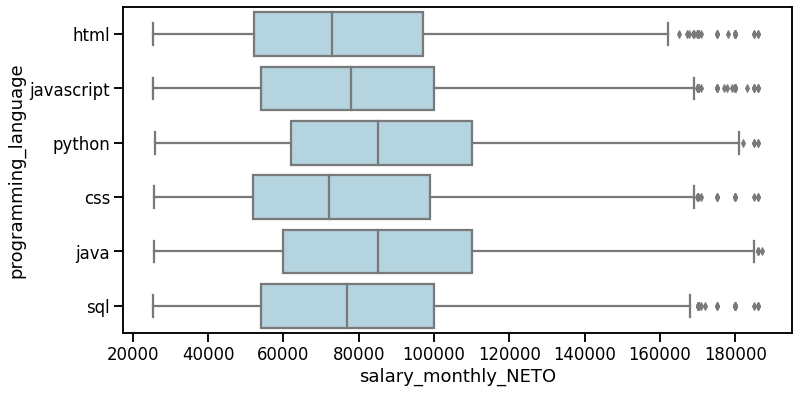

In [ ]:
#boxplots: 

plt.figure(figsize=(12, 6))
seaborn.boxplot(data=filtered_df_lang, x='salary_monthly_NETO', y='programming_language',
                color='lightblue')
plt.ticklabel_format(style='plain', axis='x')

Aca vemos que las medianas no difieren mucho entre sí, en el sentido de que todas están dentro de los IQR. 

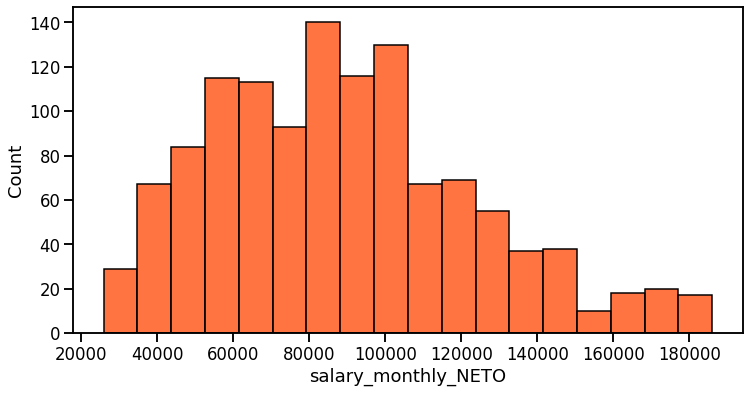

In [ ]:
plt.figure(figsize=(12, 6))
lenguajes = ['python']
seaborn.histplot(data=filtered_df_lang[filtered_df_lang.programming_language.isin(lenguajes)].sort_values(by=['salary_monthly_NETO']), x=salary_col,
                color='orangered')


plt.ticklabel_format(style='plain', axis='x')

In [ ]:
lenguajes = ['python']

datas=filtered_df_lang[filtered_df_lang.programming_language.isin(lenguajes)]
datas[['salary_monthly_NETO']].describe().round()


,salary_monthly_NETO
count,1218.0
mean,88983.0
std,34580.0
min,25800.0
25%,62125.0
50%,85052.0
75%,110000.0
max,186000.0


En el caso de Python vemos que su mediana superan a la de los demas Lenguajes de programas llegando a superar en casi un 18% a css. Por otro lado, en el grafico de arriba, vemos como se da una consentracion de casos entre los 80 y los 100 mil pesos de salario. 





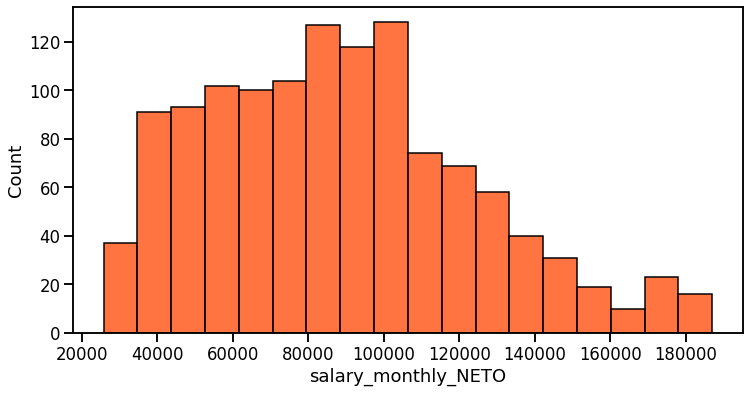

In [ ]:
plt.figure(figsize=(12, 6))
lenguajes = ['java']
seaborn.histplot(data=filtered_df_lang[filtered_df_lang.programming_language.isin(lenguajes)].sort_values(by=['salary_monthly_NETO']), x=salary_col,
                color='orangered')


plt.ticklabel_format(style='plain', axis='x')

In [ ]:
lenguajes = ['java']

datas=filtered_df_lang[filtered_df_lang.programming_language.isin(lenguajes)]
datas[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,1240.0
mean,88247.0
std,35477.0
min,25700.0
25%,60000.0
50%,85000.0
75%,110000.0
max,187000.0


Java, al igual que Python se encuentra en la parte superior de la tabla de medias, separandose de Python por solo 51 pesos. Al igual que este, en el hitograma vemos concentración de casos entre los salarios de 80 y 100 mil casos. 

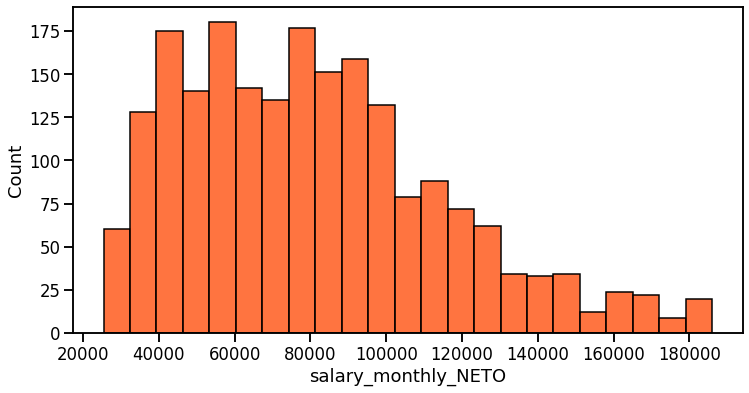

In [ ]:
plt.figure(figsize=(12, 6))
lenguajes = ['javascript']
seaborn.histplot(data=filtered_df_lang[filtered_df_lang.programming_language.isin(lenguajes)].sort_values(by=['salary_monthly_NETO']), x=salary_col,
                color='orangered')


plt.ticklabel_format(style='plain', axis='x')

In [ ]:
lenguajes = ['javascript']

datas=filtered_df_lang[filtered_df_lang.programming_language.isin(lenguajes)]
datas[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,2068.0
mean,81205.0
std,34499.0
min,25400.0
25%,54000.0
50%,78000.0
75%,100000.0
max,186000.0


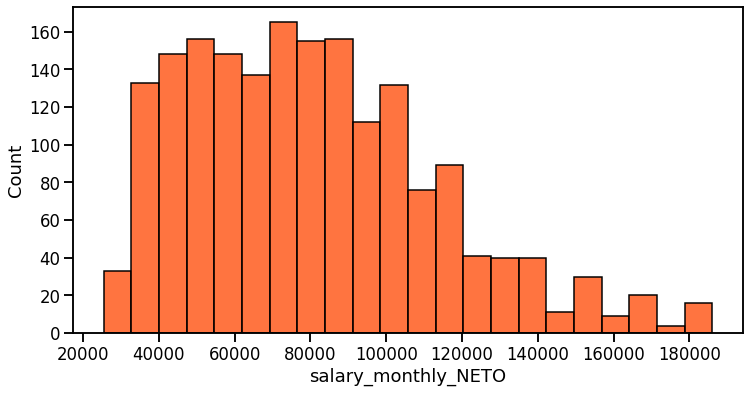

In [ ]:
plt.figure(figsize=(12, 6))
lenguajes = ['sql']
seaborn.histplot(data=filtered_df_lang[filtered_df_lang.programming_language.isin(lenguajes)].sort_values(by=['salary_monthly_NETO']), x=salary_col,
                color='orangered')


plt.ticklabel_format(style='plain', axis='x')

In [ ]:
lenguajes = ['sql']

datas=filtered_df_lang[filtered_df_lang.programming_language.isin(lenguajes)]
datas[['salary_monthly_NETO']].describe().round()

,salary_monthly_NETO
count,1851.0
mean,80575.0
std,32851.0
min,25400.0
25%,54000.0
50%,77000.0
75%,100000.0
max,186000.0


En el caso de javascript cabe aclarar que es el lenguaje (segun la encuesta) mas usado por los encuenstados, superando casi por 800 casos a los dos lenguajes antes descriptos. En el histograma vemos una mayor disperción de los datos, que aunque su media se ubique en 78 mil (un 8% menos que los lenguajes anteriores) la mayoria de los datos van desde los 40 mil a los 100 mil. 

## Conclusiones

Siendo que los datos no son tan concluyentes a la hora de establecer una clara preferencia establecida por los salarios en los lenguajes de programación,  podemos ver como Python y Java son los lenguajes en promedio mejor remunerados.  

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
